Beginning in the 1950s with simple designs and only a handful of parts, Legos have evolved to have complex sets with thousands of small pieces and expanding into covering famous IP such as Star Wars, Harry Potter, and Disney, as well as making their own content based around their own products through videogames, movies, and tv shows.

In this project I will dive into this more, and look at how legos have gone from being a simple toy to a collectors item and decoration. To stat I have a simple histogram that shows how the number of sets released each year has gone up a lot over time.

array([[<Axes: title={'center': 'year'}>]], dtype=object)

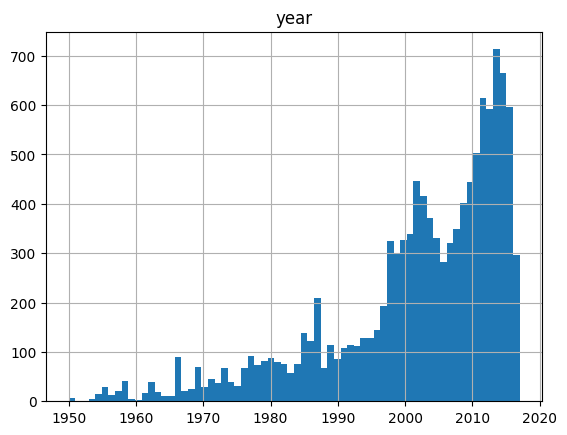

In [ ]:
import pandas as pd
import statsmodels.api as sm
setsdf = pd.read_csv('sets.csv')
themesdf = pd.read_csv('themes.csv')
themesdf['theme_id'] = themesdf['id']
setsdf = pd.merge(setsdf, themesdf, on='theme_id',how='inner')
setsdf.hist('year',bins=68)

things to include, pieces over time, themes over time, how have they grown with more themes, histogram of sets over time.

In [ ]:
model = sm.OLS(setsdf['num_parts'], sm.add_constant(setsdf['year'])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              num_parts   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     161.2
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.08e-36
Time:                        16:27:39   Log-Likelihood:                -84182.
No. Observations:               11673   AIC:                         1.684e+05
Df Residuals:                   11671   BIC:                         1.684e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5563.5682    450.984    -12.337      0.0

This regression shows that each year the number of parts in each set on average is increasing by about .22 pieces, and we can conclude that sets in general have gotten larger, as the coefficient on year in the regression is significant at the .05 level. This trend is also shown in the plot below.

<Axes: xlabel='year'>

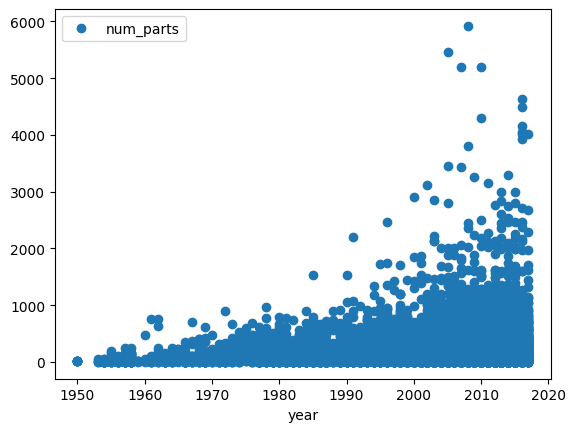

In [ ]:
setsdf.plot(x='year', y='num_parts', style='o')

However, that is still not a super meaningful conclusion, as while the largest sets have gotten much larger, there are also many smaller sets being released today, so thus if we only examine the largest set being released each year we can see the trend that there is with the largest sets getting larger over time.

<Axes: xlabel='year'>

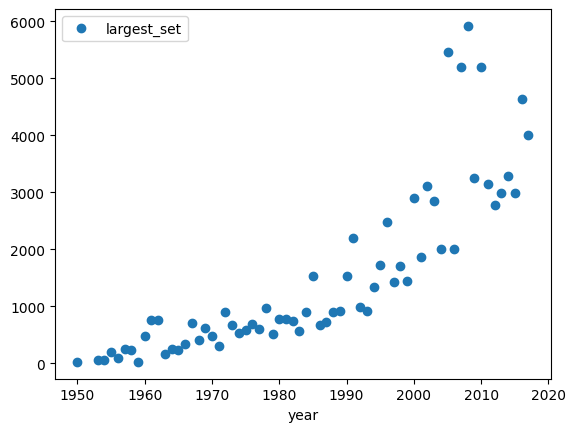

In [ ]:
max_pieces_df = setsdf.groupby('year')['num_parts'].max().reset_index()
max_pieces_df.columns = ['year', 'largest_set']
max_pieces_df.plot(x='year', y='largest_set', style='o')

This plot makes it much easier to see the upward trajectory of sets being released each year, where the upward trend is much stronger.

This is also seen in the following regression, where the largest set is shown to be growing at almost 64 pieces per year, getting it to the several thousands of pieces of the largest sets of the mid 2000s and 2010s.

In [ ]:
model = sm.OLS(max_pieces_df['largest_set'], sm.add_constant(max_pieces_df['year'])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            largest_set   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     141.9
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           6.81e-18
Time:                        16:27:15   Log-Likelihood:                -536.36
No. Observations:                  66   AIC:                             1077.
Df Residuals:                      64   BIC:                             1081.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.251e+05   1.06e+04    -11.771      0.0

similarly each year new themes are released, and that can be seen by the nyumber of themes represented by each theme in a year, as shown in the graph below

<Axes: xlabel='year'>

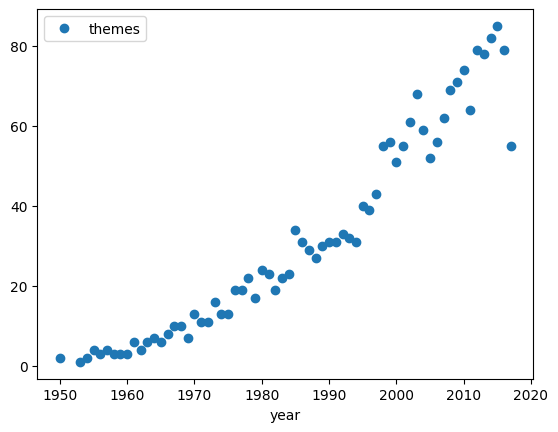

In [ ]:
themes_per_year = setsdf.groupby(setsdf['year'])['name_y'].nunique().reset_index()
themes_per_year.columns = ['year', 'themes']
themes_per_year.plot(x='year',y='themes',style='o')

Now we can do some analysis to understand the way that the number of themes has changed over time.

This model shows that the number of themes is increasing by about 1.26 per year and is significant with basic t tests on the coefficient on year.

In [ ]:
model = sm.OLS(themes_per_year['themes'], sm.add_constant(themes_per_year['year'])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 themes   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     716.5
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.81e-36
Time:                        17:48:14   Log-Likelihood:                -223.95
No. Observations:                  66   AIC:                             451.9
Df Residuals:                      64   BIC:                             456.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2471.2779     93.515    -26.427      0.0